## Exercicio proposto:
   #### - Ajustar coluna Aparência
   #### - Ajustar coluna Temperatura entre -130 F° ~ 130 F°
   #### - Ajustar coluna Umidade entre 0 ~ 100
   #### - Tratar todos valores nulos e substituí-los pela mediana

In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as srn
import statistics as sts

### Visualização e detectação dos primeiros erros

In [67]:
# Importando base de dados
dt = pd.read_csv("Tempo.csv", sep=";")
dt.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [6]:
dt.shape

(14, 5)

###### Visualização de colunas de dados categóricos

In [8]:
#Resumo de cada coluna de dados categóricos
agp = dt.groupby(["Aparencia"]).size()
agp

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

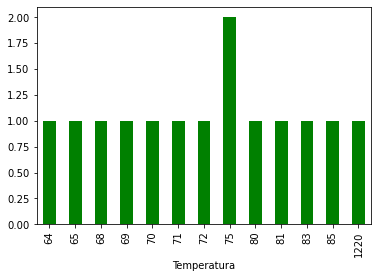

In [14]:
agp.plot.bar(color ="green")

In [16]:
agp = dt.groupby(["Vento"]).size()
agp

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

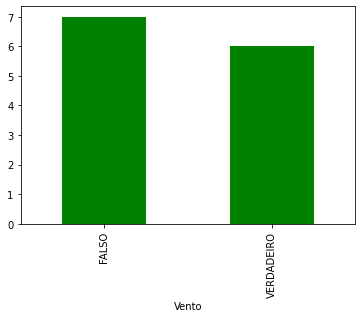

In [18]:
agp.plot.bar(color ="green")
agp

In [19]:
agp = dt.groupby(["Jogar"]).size()
agp

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

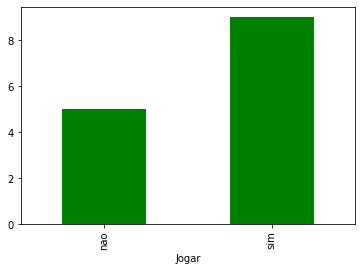

In [21]:
agp.plot.bar(color = "green")

##### Visualização e tratamento de dados numéricos 

In [22]:
dt['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\Mago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

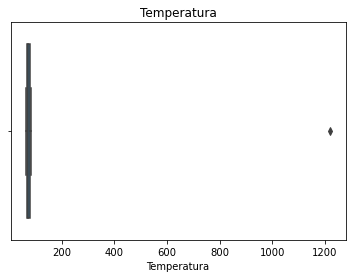

In [24]:
srn.boxplot(dt["Temperatura"]).set_title("Temperatura")

C:\Users\Mago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

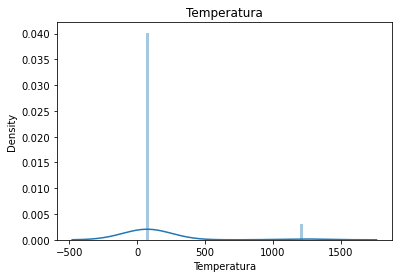

In [26]:
srn.distplot(dt["Temperatura"]).set_title("Temperatura")

In [28]:
dt["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

C:\Users\Mago\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

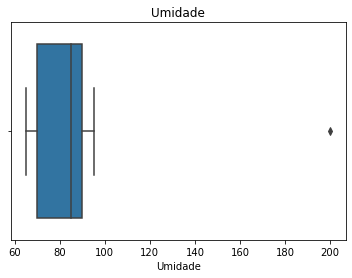

In [30]:
srn.boxplot(dt["Umidade"]).set_title("Umidade")

C:\Users\Mago\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

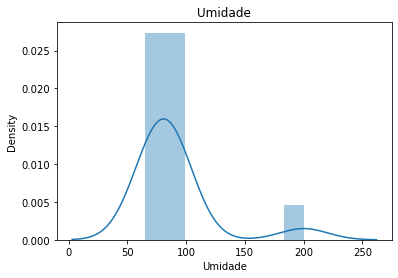

In [32]:
srn.distplot(dt["Umidade"]).set_title("Umidade")

In [33]:
#Verificação de dados Nulos
dt.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [37]:
agp = dt.groupby(["Aparencia"]).size()
agp

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [40]:
#Substituição da linha "menos" e atribuindo a linha "sol", pois se trata da moda da coluna
dt.loc[dt["Aparencia"] == "menos", "Aparencia"] = "Sol"
agp = dt.groupby(["Aparencia"]).size()
agp

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [41]:
dt["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [42]:
#Checagem se os dados estão dentro dos limites impostos
dt.loc[(dt["Temperatura"] < -130) | (dt["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [43]:
mediana = sts.median(dt["Temperatura"])
mediana

73.5

In [44]:
#Substituindo dados incorretos pela mediana da coluna temperatura
dt.loc[(dt["Temperatura"] < -130) | (dt["Temperatura"] > 130), "Temperatura"] = mediana

In [45]:
dt.loc[(dt["Temperatura"] < -130) | (dt["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [46]:
agp = dt.groupby(["Umidade"]).size()
agp

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [47]:
#Checagem dos dados nulos da coluna "Umidade"
dt["Umidade"].isnull().sum()

1

In [48]:
mediana = sts.median(dt["Umidade"])
mediana

85.5

In [49]:
#Substituindo dados nulos pela mediana da coluna "Umidade"
dt["Umidade"].fillna(mediana, inplace=True)

In [50]:
dt["Umidade"].isnull().sum()

0

In [52]:
dt.loc[(dt["Umidade"] < 0) | (dt["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [56]:
dt.loc[(dt["Umidade"] < 0) | (dt["Umidade"] > 100), "Umidade"] = mediana

In [57]:
dt.loc[(dt["Umidade"] < 0) | (dt["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [59]:
agp = dt.groupby(["Vento"]).size()
agp

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [60]:
#Checagem de dados nulos na coluna "Vento"
dt["Vento"].isnull().sum()

1

In [61]:
#Substituição de dados nulos
dt["Vento"].fillna("FALSO", inplace=True)

In [62]:
dt["Vento"].isnull().sum()

0

In [64]:
dt.describe()

,Temperatura,Umidade
count,14.000000,14.000000
mean,73.678571,81.285714
std,6.556286,9.585073
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.750000,85.250000
75%,78.750000,89.000000
max,85.000000,95.000000
